In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # 10 classes

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 64ms/step - accuracy: 0.3054 - loss: 1.8559 - val_accuracy: 0.5303 - val_loss: 1.2904
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 50ms/step - accuracy: 0.5222 - loss: 1.3252 - val_accuracy: 0.6031 - val_loss: 1.1067
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.5966 - loss: 1.1424 - val_accuracy: 0.6326 - val_loss: 1.0296
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6410 - loss: 1.0207 - val_accuracy: 0.6534 - val_loss: 0.9645
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6708 - loss: 0.9439 - val_accuracy: 0.6791 - val_loss: 0.9111
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6883 - loss: 0.8821 - val_accuracy: 0.6683 - val_loss: 0.9502
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.7123 - loss: 0.8253 - val_accuracy: 0.6942 - val_loss: 0.8748
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7307

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Confusion Matrix:
 [[709  25  71  27  12   6  12   7  91  40]
 [ 11 851   6   9   2   5   5   2  32  77]
 [ 71   8 603  89  56  67  79  17   5   5]
 [ 15  12  45 612  32 158  65  21  19  21]
 [ 24   2  80  97 606  49  76  40  16  10]
 [  8   2  36 185  27 659  31  31   8  13]
 [  7   5  43  86  16  20 798   4  10  11]
 [ 16   5  35  91  70  89  10 653   4  27]
 [ 57  23   8  22   5   3   3   2 846  31]
 [ 26  72  10  17   2   6   6  10  36 815]]


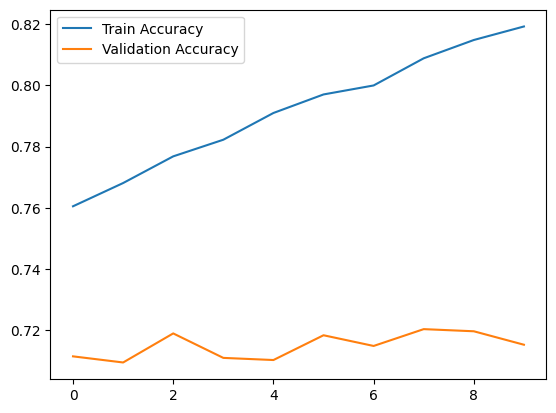

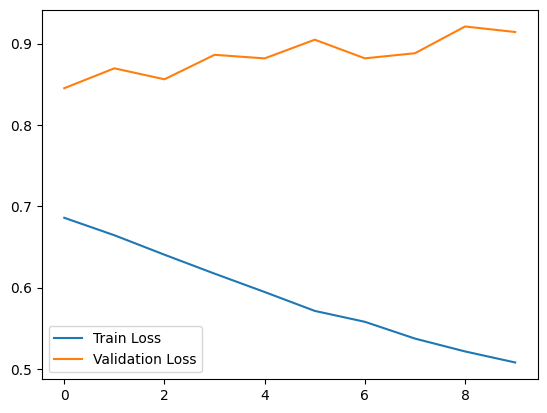

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
model.save("cnn_image_classifier.h5")
print("Model saved successfully")


Model saved successfully


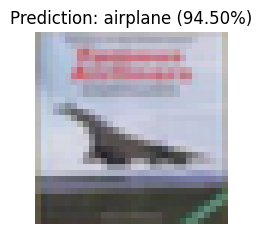

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

def predict_image(index):
    img = X_test[index]

    # model input (already normalized)
    img_input = img.reshape(1, 32, 32, 3)

    prediction = model.predict(img_input, verbose=0)
    class_id = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # FIX: better display (no smoothing blur)
    plt.figure(figsize=(2.5, 2.5))
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    plt.title(f"Prediction: {class_names[class_id]} ({confidence:.2f}%)")
    plt.show()

# Example
predict_image(3)
